In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch
from scipy.stats import skew, kurtosis, entropy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
import pandas as pd
from scipy.io import arff  # For loading .arff files

h_train_data, h_train_meta = arff.loadarff('../data/EOGHorizontalSignal_TRAIN.arff')
hEOG_train = pd.DataFrame(h_train_data)

h_test_data, h_test_meta = arff.loadarff('../data/EOGHorizontalSignal_TEST.arff')
hEOG_test = pd.DataFrame(h_test_data)

v_train_data, v_train_meta = arff.loadarff('../data/EOGVerticalSignal_TRAIN.arff')
vEOG_train = pd.DataFrame(v_train_data)

v_test_data, v_test_meta = arff.loadarff('../data/EOGVerticalSignal_TEST.arff')
vEOG_test = pd.DataFrame(v_test_data)

In [3]:
#convert target column into integer
hEOG_train['target'] = hEOG_train['target'].apply(lambda x: int(x.decode('utf-8')))
vEOG_train['target'] = vEOG_train['target'].apply(lambda x: int(x.decode('utf-8')))
hEOG_test['target'] = hEOG_test['target'].apply(lambda x: int(x.decode('utf-8')))
vEOG_test['target'] = vEOG_test['target'].apply(lambda x: int(x.decode('utf-8')))

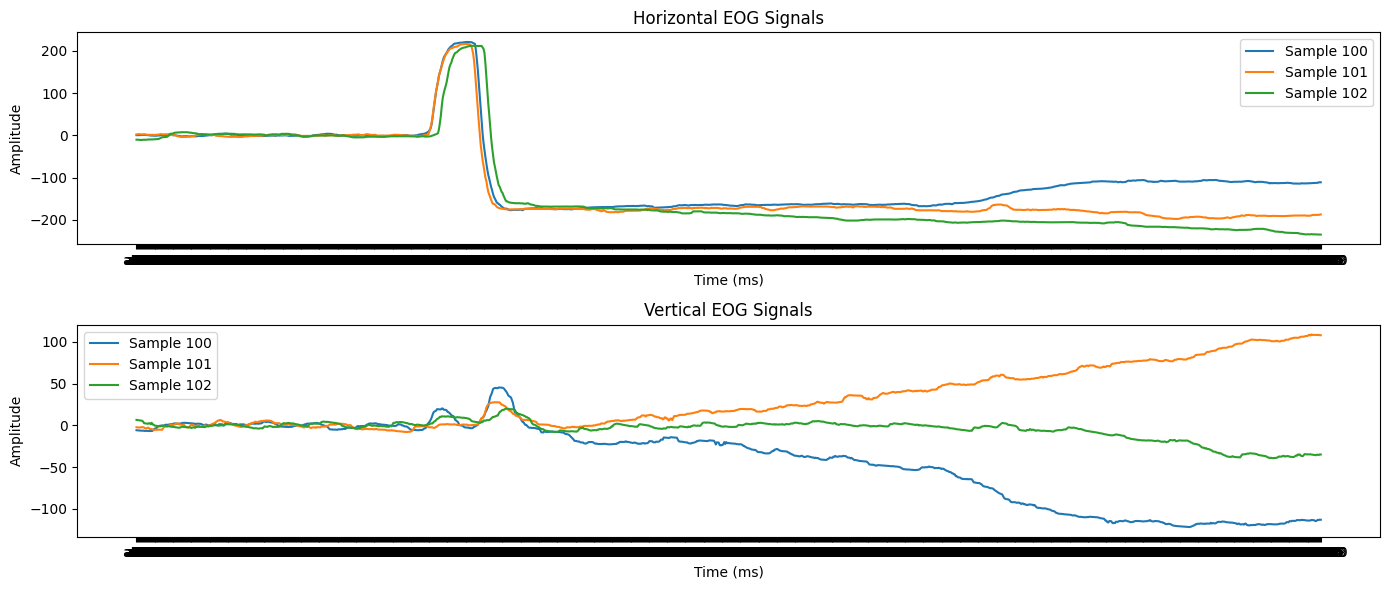

In [6]:
# Plot function for EOG signals
def plot_eog_signals(horizontal_data, vertical_data, signal_length=1250):
    # Plot Horizontal EOG Signal (first sample)
    plt.figure(figsize=(14, 6))

    # Plot horizontal EOG signals for a few samples
    plt.subplot(2, 1, 1)
    for i in range(3):  # Plot first 3 samples
        plt.plot(horizontal_data.iloc[i, :signal_length], label=f"Sample {i+100}")
    plt.title("Horizontal EOG Signals")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude")
    plt.legend()

    # Plot Vertical EOG Signal (first sample)
    plt.subplot(2, 1, 2)
    for i in range(3):  # Plot first 3 samples
        plt.plot(vertical_data.iloc[i, :signal_length], label=f"Sample {i+100}")
    plt.title("Vertical EOG Signals")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude")
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Plot the EOG signals (Use first few rows as example)
plot_eog_signals(hEOG_train.drop(columns=['target']), vEOG_train.drop(columns=['target']))


In [7]:
#signal de-noising

from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Parameters for filtering
fs = 1000  # Sampling rate (1 kHz)
lowcut = 0.05  # Low frequency cut (for removing drift)
highcut = 30.0  # High frequency cut (for noise reduction)

# Apply filtering on the train EOG signal
hEOG_train_filtered = hEOG_train.drop(columns=['target']).apply(lambda x: butter_bandpass_filter(x, lowcut, highcut, fs))
vEOG_train_filtered = vEOG_train.drop(columns=['target']).apply(lambda x: butter_bandpass_filter(x, lowcut, highcut, fs))
# Apply filtering on the test EOG signal
hEOG_test_filtered = hEOG_test.drop(columns=['target']).apply(lambda x: butter_bandpass_filter(x, lowcut, highcut, fs))
vEOG_test_filtered = vEOG_test.drop(columns=['target']).apply(lambda x: butter_bandpass_filter(x, lowcut, highcut, fs))


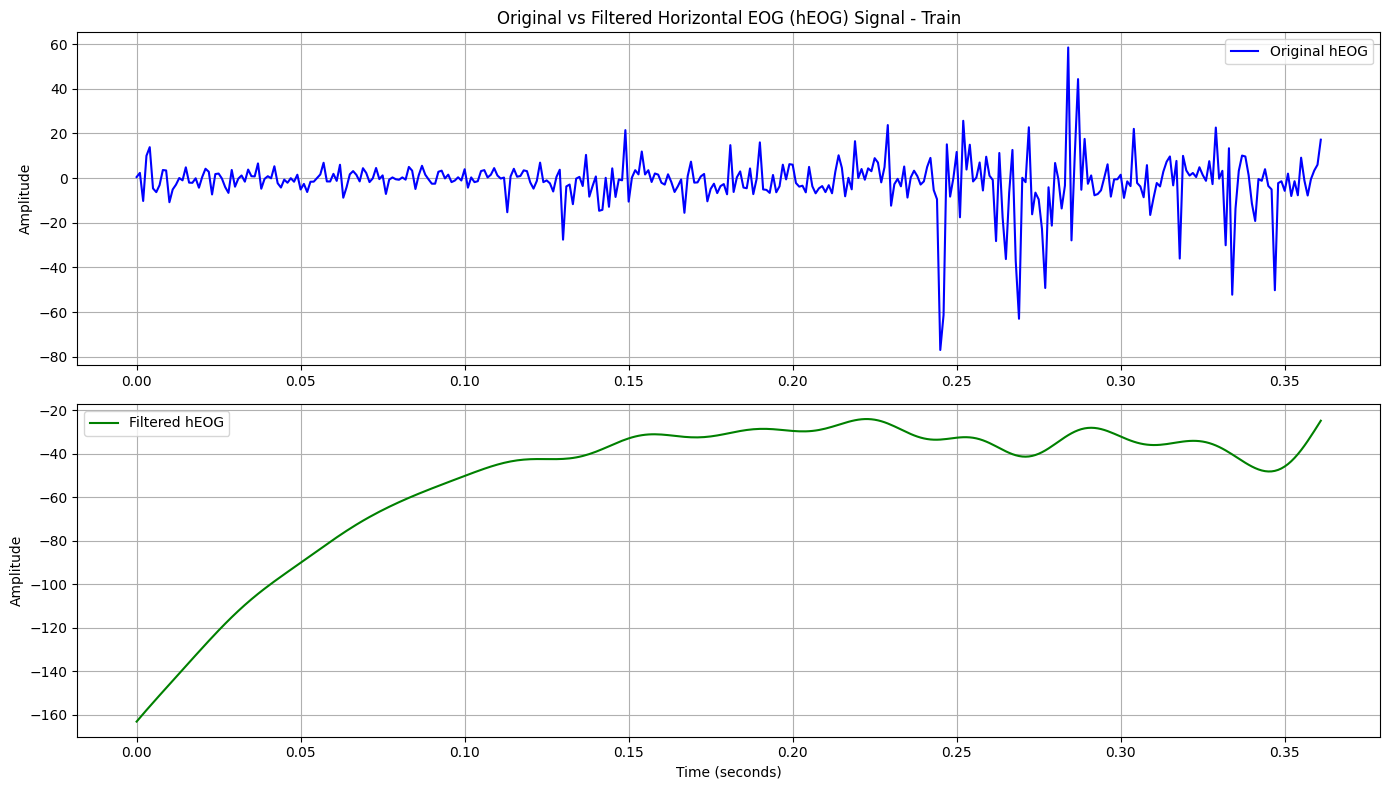

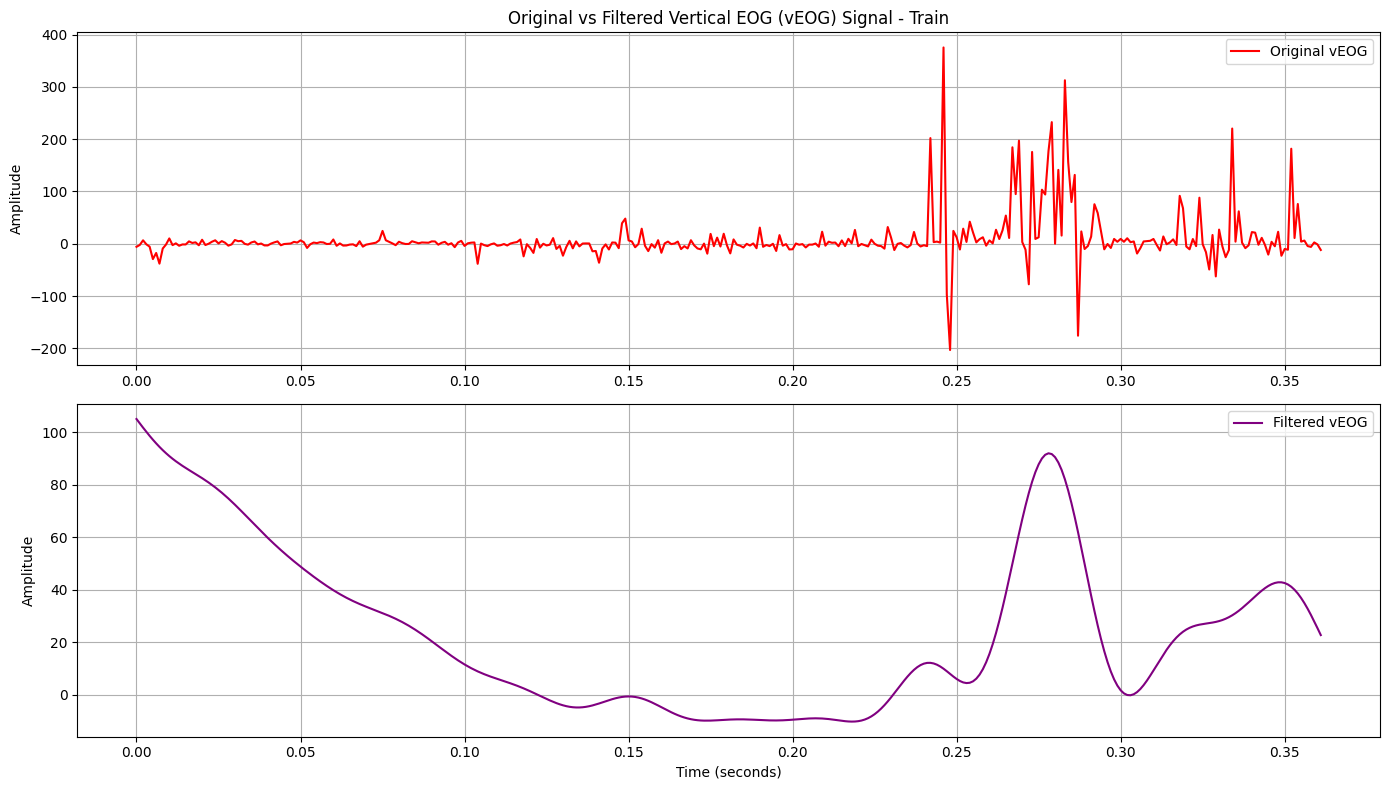

In [10]:
import matplotlib.pyplot as plt

# Time index based on the sampling rate
time_train = np.arange(0, len(hEOG_train_filtered)) / fs  # For the training data
time_test = np.arange(0, len(hEOG_test_filtered)) / fs    # For the testing data

# Select a sample column (e.g., the first signal in the dataset)
sample_idx = 0  # Adjust index based on your data

# Plot comparison for horizontal EOG (hEOG) signals - Training Data
plt.figure(figsize=(14, 8))

# Plot original hEOG
plt.subplot(2, 1, 1)
plt.plot(time_train, hEOG_train.iloc[:, sample_idx], label='Original hEOG', color='blue')
plt.title('Original vs Filtered Horizontal EOG (hEOG) Signal - Train')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Plot filtered hEOG
plt.subplot(2, 1, 2)
plt.plot(time_train, hEOG_train_filtered.iloc[:, sample_idx], label='Filtered hEOG', color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Plot comparison for vertical EOG (vEOG) signals - Training Data
plt.figure(figsize=(14, 8))

# Plot original vEOG
plt.subplot(2, 1, 1)
plt.plot(time_train, vEOG_train.iloc[:, sample_idx], label='Original vEOG', color='red')
plt.title('Original vs Filtered Vertical EOG (vEOG) Signal - Train')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Plot filtered vEOG
plt.subplot(2, 1, 2)
plt.plot(time_train, vEOG_train_filtered.iloc[:, sample_idx], label='Filtered vEOG', color='purple')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
